<a href="https://colab.research.google.com/github/firstnapat/Machine-Learning-with-Python-BoyBigDataRPG/blob/main/WK08_Machine_Learning_Temp_Smart_Home_Forecasting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data
- using gdown
https://pypi.org/project/gdown/

In [ ]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = "https://drive.google.com/drive/folders/1-vqyfpMhuUjF0t_USdvoXMkW7HtuA0op"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/data-home-temp/test.csv', '/content/data-home-temp/train.csv']

In [ ]:
df_train = pd.read_csv("/content/data-home-temp/train.csv")
df_test = pd.read_csv("/content/data-home-temp/test.csv")

In [ ]:
df_train.shape, df_test.shape

((2764, 19), (1373, 18))

In [ ]:
df_train[:3]

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.375,2.0,17.8275
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.808,2.0,18.1207
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.432,2.0,18.4367


## Filter Data with Datetime

In [ ]:
df_train["datetime"] = pd.to_datetime(df_train['Date'] + ' ' + df_train['Time'])

# Prepare Dataset

## Check Correlation

In [ ]:
df_corr = df_train.corr().abs()

In [ ]:
print(np.ones_like(df_corr))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
print(np.triu(np.ones_like(df_corr)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


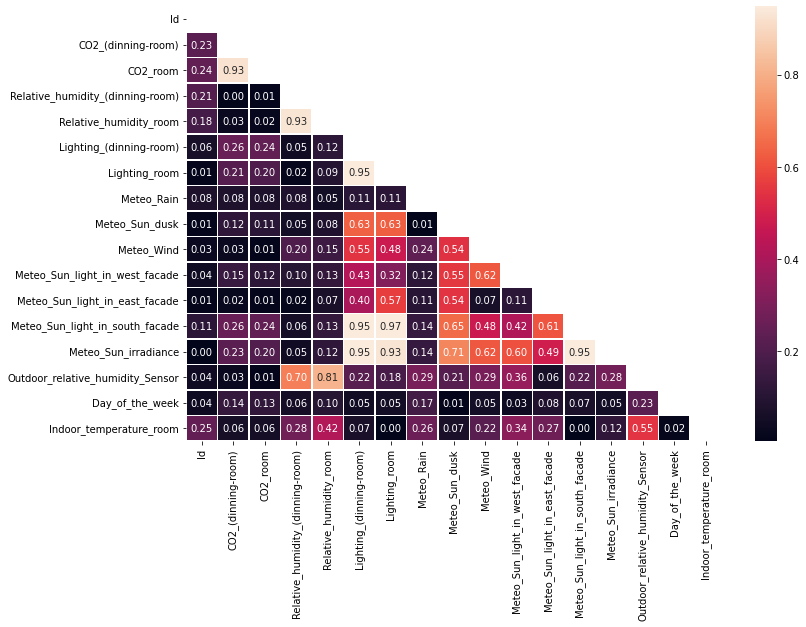

In [ ]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

In [ ]:
features_columns = [
    "CO2_room",
    "Relative_humidity_room",
    "Meteo_Sun_irradiance",
    'Meteo_Rain',
    'Meteo_Sun_dusk', 
    'Meteo_Wind', 
    'Meteo_Sun_light_in_west_facade',
    'Meteo_Sun_light_in_east_facade',
    'Outdoor_relative_humidity_Sensor',
    'Day_of_the_week'
]

## Train Test Split 

In [ ]:
len(df_train) * 0.8

2211.2000000000003

In [ ]:
df_train_prepared = df_train[features_columns + ["Id", "Indoor_temperature_room"]][:2111]
df_valid_prepared = df_train[features_columns + ["Id", "Indoor_temperature_room"]][2111:]

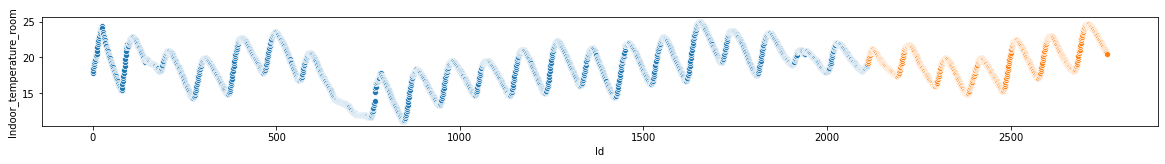

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')

## Check Distribution and Range Train Valid

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


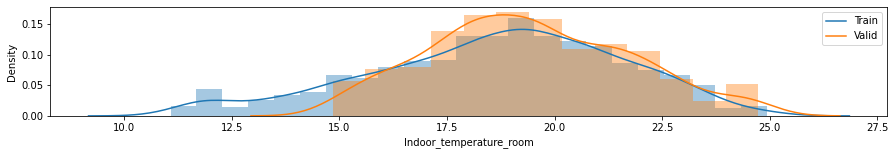

In [ ]:
plt.figure(figsize=(15, 2));
sns.distplot(df_train_prepared["Indoor_temperature_room"]);
sns.distplot(df_valid_prepared["Indoor_temperature_room"]);
plt.legend(["Train", "Valid"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


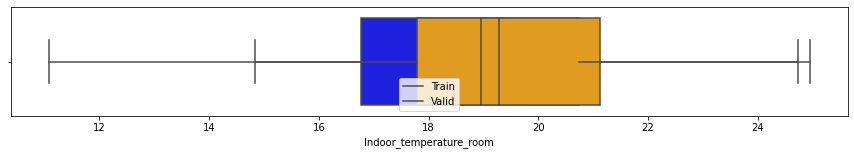

In [ ]:
plt.figure(figsize=(15, 2));
sns.boxplot(df_train_prepared["Indoor_temperature_room"], color="blue");
sns.boxplot(df_valid_prepared["Indoor_temperature_room"], color="orange");
plt.legend(["Train", "Valid"])

## Preprocessing

## Normalization and Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
norm = MinMaxScaler()
stand = StandardScaler()

In [ ]:
X_trian = df_train_prepared[features_columns].values
X_val = df_valid_prepared[features_columns].values

y_train = df_train_prepared["Indoor_temperature_room"].values
y_val = df_valid_prepared["Indoor_temperature_room"].values

In [ ]:
X_trian.shape, X_val.shape, y_train.shape, y_val.shape

((2111, 10), (653, 10), (2111,), (653,))

In [ ]:
X_train_norm = norm.fit_transform(X_trian)
X_train_std = stand.fit_transform(X_train_norm)

X_val_norm = norm.transform(X_val)
X_val_std = stand.transform(X_val_norm)

# Modeling

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]}

In [ ]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [ ]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='neg_mean_squared_error')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

-7.845659613555038
7


In [ ]:
opt_clf_tree = DecisionTreeRegressor(max_depth=7, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=7, random_state=2022)

In [ ]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.8566085098064108
R-Square Validation:  -0.4113480655204189
MAE Train:  0.7521588258419475
MAE Validation:  2.117446797563678


In [ ]:
df_train_prepared["y_pred_01"] = y_train_opt_clf_tree
df_valid_prepared["y_pred_01"] = y_val_opt_clf_tree

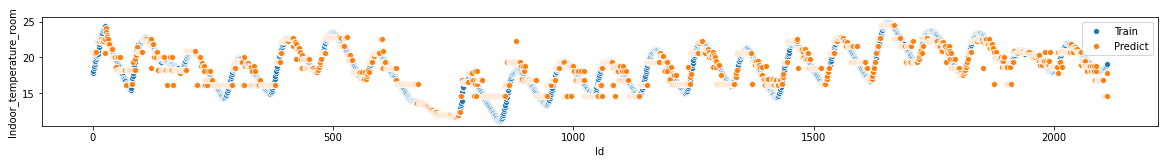

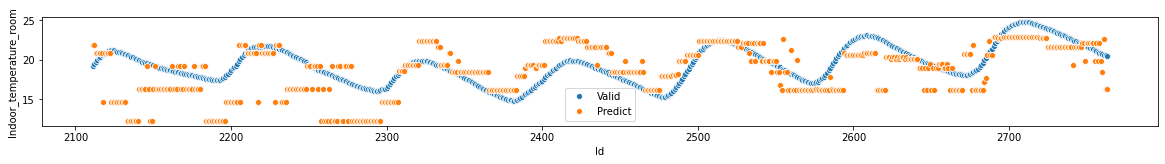

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_01", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_01", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

# Strategy on Spliting in Timeseries Dataset

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=20, test_size=30)

cv_ls = []
for train_index, valid_index in tscv.split(X_train_std):
    cv_ls.append((train_index, valid_index))

## Check split

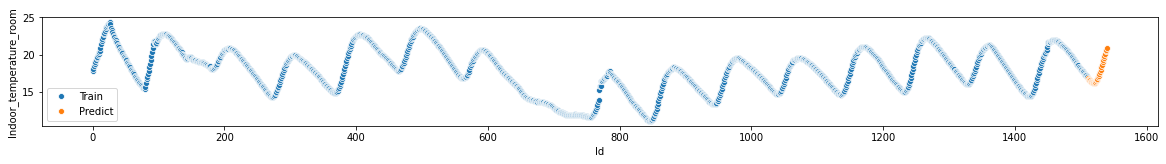

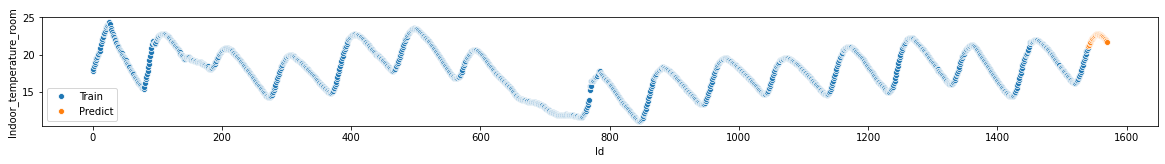

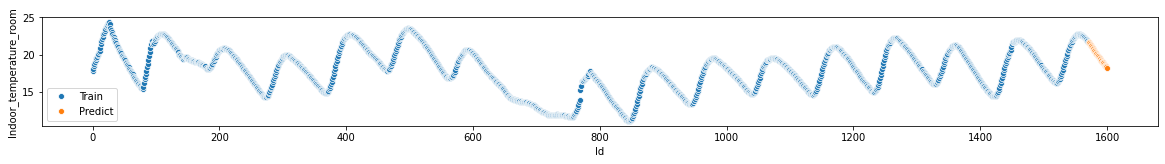

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

## Tuning

In [ ]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [ ]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([   0,    1,    2, ..., 1508, 1509, 1510]),
                  array([1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521,
       1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532,
       1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540])),
                 (array([   0,    1,    2, ..., 1538, 1539, 1540]),
                  array([1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551,
       1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1...
       2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080])),
                 (array([   0,    1,    2, ..., 2078, 2079, 2080]),
                  array([2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102,
       2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]}

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

-6.04654335226731
5


In [ ]:
opt_clf_tree = DecisionTreeRegressor(max_depth=5, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2022)

In [ ]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.7368839564938549
R-Square Validation:  -0.2699178058887757
MAE Train:  1.0872121020283936
MAE Validation:  2.027889465906566


In [ ]:
df_train_prepared["y_pred_02"] = y_train_opt_clf_tree
df_valid_prepared["y_pred_02"] = y_val_opt_clf_tree

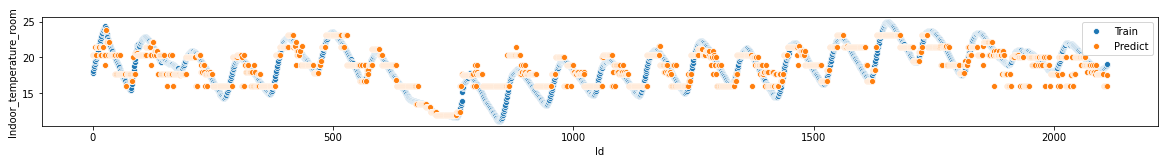

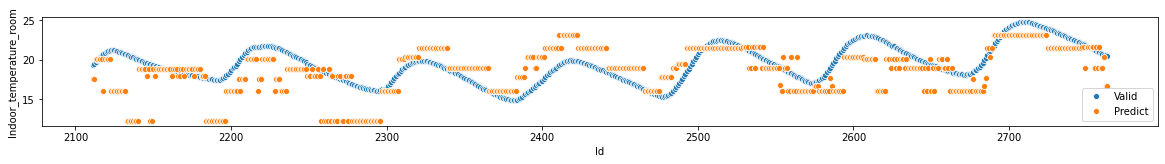

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_02", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_02", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

## More Tuning

In [ ]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [ ]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ["auto", "sqrt", "log2"]}

In [ ]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([   0,    1,    2, ..., 1508, 1509, 1510]),
                  array([1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521,
       1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532,
       1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540])),
                 (array([   0,    1,    2, ..., 1538, 1539, 1540]),
                  array([1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551,
       1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1...
                  array([2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102,
       2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5,

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

-4.980250021869282
DecisionTreeRegressor(max_depth=11, max_features='sqrt', min_samples_split=10,
                      random_state=2022)


In [ ]:
opt_clf_tree = DecisionTreeRegressor(random_state=2022, max_depth=11, max_features='sqrt', min_samples_split=10)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=11, max_features='sqrt', min_samples_split=10,
                      random_state=2022)

In [ ]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.9505947660866254
R-Square Validation:  -0.8376959500146282
MAE Train:  0.41059178758441156
MAE Validation:  2.284445049963053


In [ ]:
df_train_prepared["y_pred_03"] = y_train_opt_clf_tree
df_valid_prepared["y_pred_03"] = y_val_opt_clf_tree

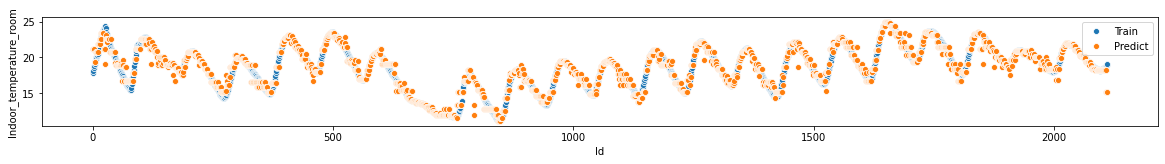

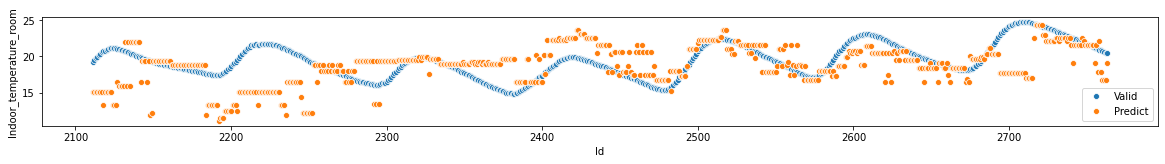

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_03", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_03", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

# More Spliting on Validation

In [ ]:
tscv = TimeSeriesSplit(n_splits=20, test_size=100)

cv_ls = []
for train_index, valid_index in tscv.split(X_train_std):
    cv_ls.append((train_index, valid_index))

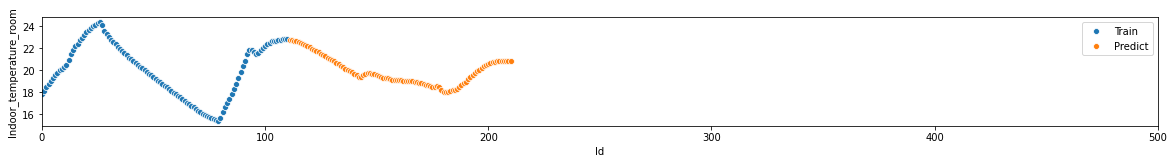

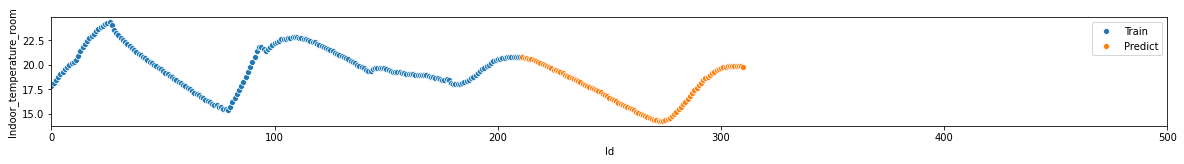

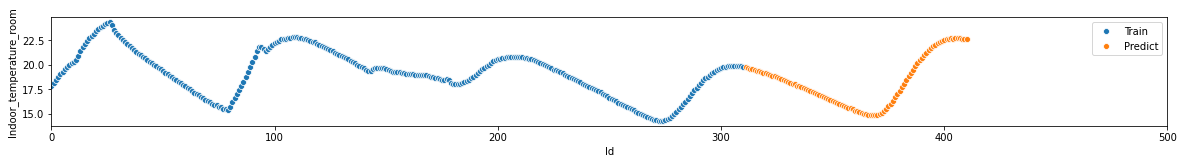

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

## Tuning Again 

In [ ]:
clf_tree = DecisionTreeRegressor(random_state=2022)

In [ ]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108...
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
       2110]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

-6.975355489379901
DecisionTreeRegressor(max_depth=11, max_features='sqrt', min_samples_split=9,
                      random_state=2022)


In [ ]:
opt_clf_tree = DecisionTreeRegressor(max_depth=11, max_features='sqrt', min_samples_split=9, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=11, max_features='sqrt', min_samples_split=9,
                      random_state=2022)

In [ ]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.9391370710658917
R-Square Validation:  -0.9667982839532636
MAE Train:  0.4780856277982619
MAE Validation:  2.5303372665340045


In [ ]:
df_train_prepared["y_pred_04"] = y_train_opt_clf_tree
df_valid_prepared["y_pred_04"] = y_val_opt_clf_tree

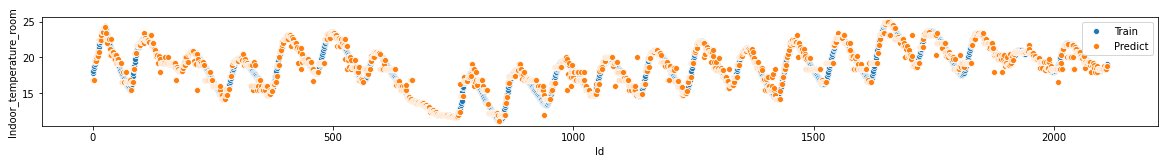

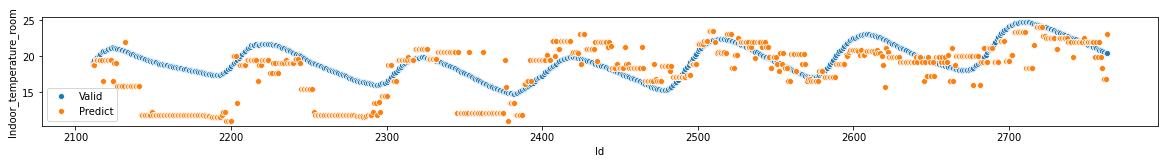

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_04", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_04", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

# One more spliting

In [ ]:
tscv = TimeSeriesSplit(n_splits=20, test_size=100)

cv_ls = []
for idx, (train_index, valid_index) in zip(range(0, 20, 1), tscv.split(X_train_std)):
    cv_ls.append((train_index[idx*100:], valid_index))

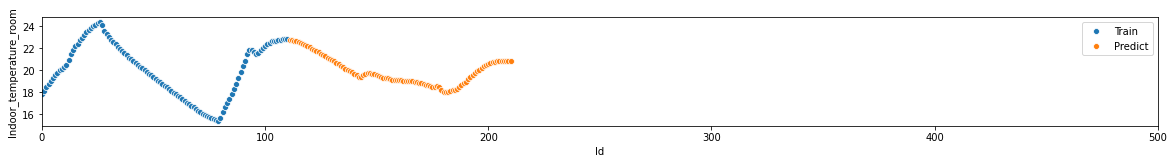

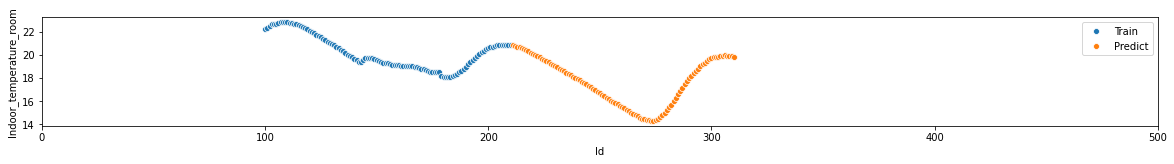

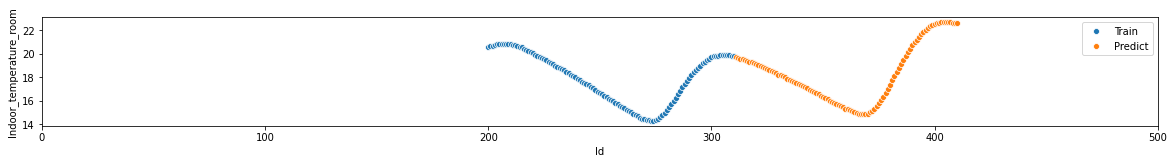

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[0][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[1][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][0]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared.iloc[cv_ls[2][1]], x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
plt.xlim(0, 500)
plt.legend(["Train", "Predict"])

## Tune one more time

In [ ]:
param_grid

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
clf_tree = DecisionTreeRegressor(random_state=2022)
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108...
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
       2110]))],
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_estimator_.min_samples_split)

-6.700683827002328
DecisionTreeRegressor(max_depth=9, max_features='sqrt', random_state=2022)
2


In [ ]:
opt_clf_tree = DecisionTreeRegressor(max_depth=9, max_features='sqrt', min_samples_split=2, random_state=2022)
opt_clf_tree.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=9, max_features='sqrt', random_state=2022)

In [ ]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train_std)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_tree))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_tree))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_tree))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_tree))
print("="*50)

R-Square Train:  0.8620191521792726
R-Square Validation:  -0.6588730841177781
MAE Train:  0.7059642019554303
MAE Validation:  2.3495669779323705


In [ ]:
df_train_prepared["y_pred_05"] = y_train_opt_clf_tree
df_valid_prepared["y_pred_05"] = y_val_opt_clf_tree

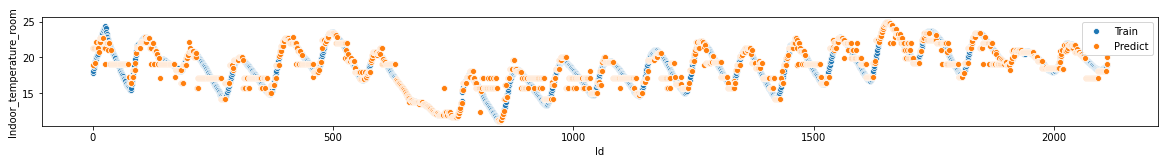

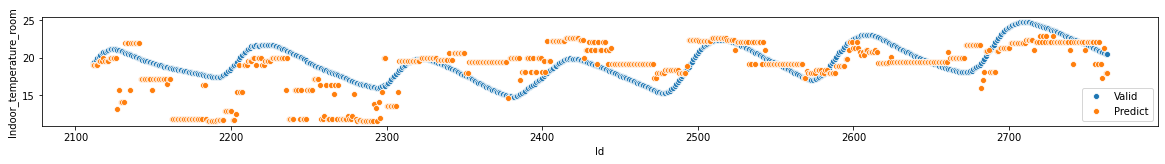

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_05", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_05", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf_rand = RandomForestRegressor(random_state=2022)

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ["auto", "sqrt", "log2"]}

In [ ]:
grid = GridSearchCV(estimator=clf_rand, 
                    param_grid=param_grid, 
                    scoring="neg_mean_squared_error", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train_std, y_train)

GridSearchCV(cv=[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108...
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
       2110]))],
             estimator=RandomForestRegressor(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

-4.916355919904464
RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      random_state=2022)


In [ ]:
opt_clf_rand = RandomForestRegressor(random_state=2022, max_depth=8, max_features='sqrt', min_samples_split=4)
opt_clf_rand.fit(X_train_std, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      random_state=2022)

In [ ]:
y_train_opt_clf_rand = opt_clf_rand.predict(X_train_std)
y_val_opt_clf_rand = opt_clf_rand.predict(X_val_std)

In [ ]:
print("R-Square Train: ", r2_score(y_train, y_train_opt_clf_rand))
print("R-Square Validation: ", r2_score(y_val, y_val_opt_clf_rand))
print("="*50)
print("MAE Train: ", mean_absolute_error(y_train, y_train_opt_clf_rand))
print("MAE Validation: ", mean_absolute_error(y_val, y_val_opt_clf_rand))
print("="*50)

R-Square Train:  0.9270275270362052
R-Square Validation:  -0.45285173017568137
MAE Train:  0.5743117813527583
MAE Validation:  2.300918635980737


In [ ]:
df_train_prepared["y_pred_06"] = y_train_opt_clf_rand
df_valid_prepared["y_pred_06"] = y_val_opt_clf_rand

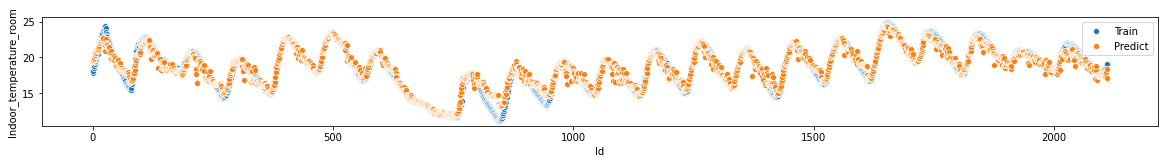

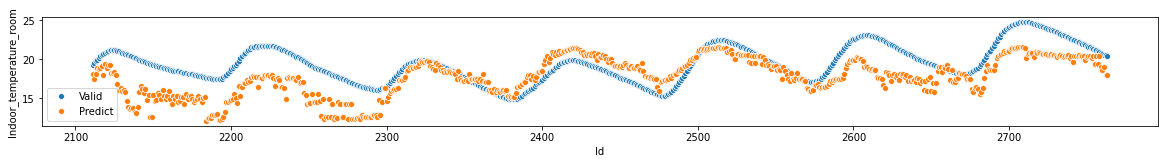

In [ ]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_train_prepared, x="Id", y="y_pred_06", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=df_valid_prepared, x="Id", y="Indoor_temperature_room", marker='o', linestyle='')
sns.lineplot(data=df_valid_prepared, x="Id", y="y_pred_06", marker='o', linestyle='')
plt.legend(["Valid", "Predict"])